In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Embedding, Activation, Input, Flatten
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

import tensorflow as tf

from keras.layers import LSTM, Bidirectional
from keras.models import Model
from keras.callbacks import EarlyStopping

import gensim

In [2]:
df = pd.read_csv('Banglish EDA.csv',encoding= 'unicode_escape')


print(df.Emotion.value_counts())

df.head(10)


surprise    1319
happy       1305
sad         1288
angry       1272
fear        1231
disgust     1196
Name: Emotion, dtype: int64


,Emotion,text
0,sad,hefajoter pokkhe michil theke hamlay ahoto awa...
1,angry,e chara mask chara probesh korte dicchi na
2,disgust,vore uthe batch porano college e class neya ab...
3,angry,eita pata chagler kach
4,disgust,sob dalal diye vore geche!
5,sad,Corona virus mohamari khotigrostho desher tali...
6,sad,jgnnath bishowbiddaloy kotripokkho mul riporhh...
7,fear,fole durbolota matha ghorano matha betha khitk...
8,surprise,nirbachon borjon shothik chilo
9,disgust,pakisthan ottanto protisodh porayn ekti hingsr...


In [3]:
df.head

<bound method NDFrame.head of       Emotion                                               text
0         sad  hefajoter pokkhe michil theke hamlay ahoto awa...
1       angry         e chara mask chara probesh korte dicchi na
2     disgust  vore uthe batch porano college e class neya ab...
3       angry                             eita pata chagler kach
4     disgust                         sob dalal diye vore geche!
...       ...                                                ...
7606     fear  tbe sakoti niymit sngskar na koray bortomane e...
7607    angry                            amar oporadh ami hindu 
7608    angry  apnara kiser zukti niye bolechen amar sudhu ek...
7609     fear                   ar baki sob hotta mene neya zay!
7610    angry  BNP kkhn khomotay ashole eder ki hobe? eder ke...

[7611 rows x 2 columns]>

In [4]:
df.groupby("Emotion").describe()

text                                                               
         count unique                                                top freq
Emotion                                                                      
angry     1272    881  jonogon vot kendre zayni odhikangs manusher sh...    6
disgust   1196    628  mzadam sekh hasina khali hate firechen ta khar...    9
fear      1231    586  ete bojha gel ze khmotoay tike thakar jonno do...   11
happy     1305    913                                         dhonnobaad   10
sad       1288   1051  shontaner sob khrc dile ki shontaner bap hoya ...    5
surprise  1319    648       cheler biyete ma jante parlen kone tar meye!   11

In [5]:
df.head

<bound method NDFrame.head of       Emotion                                               text
0         sad  hefajoter pokkhe michil theke hamlay ahoto awa...
1       angry         e chara mask chara probesh korte dicchi na
2     disgust  vore uthe batch porano college e class neya ab...
3       angry                             eita pata chagler kach
4     disgust                         sob dalal diye vore geche!
...       ...                                                ...
7606     fear  tbe sakoti niymit sngskar na koray bortomane e...
7607    angry                            amar oporadh ami hindu 
7608    angry  apnara kiser zukti niye bolechen amar sudhu ek...
7609     fear                   ar baki sob hotta mene neya zay!
7610    angry  BNP kkhn khomotay ashole eder ki hobe? eder ke...

[7611 rows x 2 columns]>

In [6]:
df.isnull()

,Emotion,text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
7606,False,False
7607,False,False
7608,False,False
7609,False,False


In [7]:
df.dropna(inplace=True)

In [8]:
text = df['text'].values.tolist()

In [9]:
df.groupby("Emotion").describe()

text                                                               
         count unique                                                top freq
Emotion                                                                      
angry     1272    881  jonogon vot kendre zayni odhikangs manusher sh...    6
disgust   1196    628  mzadam sekh hasina khali hate firechen ta khar...    9
fear      1231    586  ete bojha gel ze khmotoay tike thakar jonno do...   11
happy     1305    913                                         dhonnobaad   10
sad       1288   1051  shontaner sob khrc dile ki shontaner bap hoya ...    5
surprise  1319    648       cheler biyete ma jante parlen kone tar meye!   11

In [10]:
df["Emotion"].value_counts()

surprise    1319
happy       1305
sad         1288
angry       1272
fear        1231
disgust     1196
Name: Emotion, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


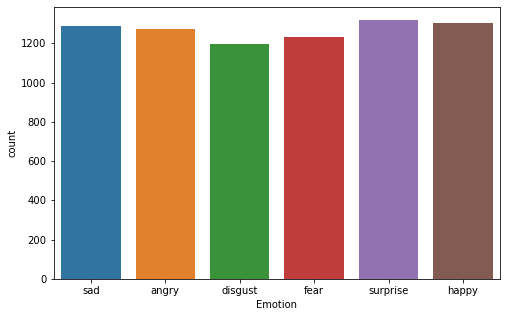

In [11]:
plt.subplots(figsize=(8,5))
sns.countplot(df["Emotion"])
plt.show()

In [12]:
longest_string = max(df["text"], key=len)
print(len(longest_string))

1889


In [13]:
print("data shape", df.shape)

data shape (7611, 2)


In [14]:
df.describe

<bound method NDFrame.describe of       Emotion                                               text
0         sad  hefajoter pokkhe michil theke hamlay ahoto awa...
1       angry         e chara mask chara probesh korte dicchi na
2     disgust  vore uthe batch porano college e class neya ab...
3       angry                             eita pata chagler kach
4     disgust                         sob dalal diye vore geche!
...       ...                                                ...
7606     fear  tbe sakoti niymit sngskar na koray bortomane e...
7607    angry                            amar oporadh ami hindu 
7608    angry  apnara kiser zukti niye bolechen amar sudhu ek...
7609     fear                   ar baki sob hotta mene neya zay!
7610    angry  BNP kkhn khomotay ashole eder ki hobe? eder ke...

[7611 rows x 2 columns]>

In [15]:
Emotion_Class=df.Emotion.unique()
dic={}
for i,Emotion in enumerate(Emotion_Class):
    dic[Emotion]=i
labels=df.Emotion.apply(lambda x:dic[x])
print(labels)

0       0
1       1
2       2
3       1
4       2
       ..
7606    3
7607    1
7608    1
7609    3
7610    1
Name: Emotion, Length: 7611, dtype: int64


In [16]:
val_data=df.sample(frac=0.2,random_state=200)
train_data=df.drop(val_data.index)

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [18]:
texts=train_data.text

In [19]:
NUM_WORDS=20000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(texts)
sequences_valid=tokenizer.texts_to_sequences(val_data.text)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12092 unique tokens.


In [20]:
X_train = pad_sequences(sequences_train)
X_val = pad_sequences(sequences_valid,maxlen=X_train.shape[1])
y_train = to_categorical(np.asarray(labels[train_data.index]))
y_val = to_categorical(np.asarray(labels[val_data.index]))
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (6089, 288) (1522, 288)
Shape of label train and validation tensor: (6089, 6) (1522, 6)


In [21]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('C:/Users/moshi/Python Code/Vietnam and Indonesia/GoogleNews-vectors-negative300.bin', binary=True)

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)
print(embedding_matrix.shape)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

(12093, 300)


In [22]:
from keras.layers import Embedding
EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)

embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM)


#calculating max length of the vector
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_val]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 288


In [23]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
sequence_length = X_train.shape[1]
act= "swish"
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [24]:
from keras import layers
from keras.models import Sequential

In [25]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=EMBEDDING_DIM, weights = [embedding_matrix], input_length=maxlen))
model.add(layers.Dropout(0.3)) 
model.add(layers.Conv1D(filters=64, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.3))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation=act)) 
model.add(layers.MaxPool1D(pool_size=3)) 
model.add(layers.Dropout(0.3))
model.add(layers.Bidirectional(layers.LSTM(256, recurrent_dropout=0.3)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation=act)) 
model.add(layers.Dropout(0.3)) 
model.add(layers.Dense(6, activation="softmax"))
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 288, 300)          3627900   
                                                                 
 dropout (Dropout)           (None, 288, 300)          0         
                                                                 
 conv1d (Conv1D)             (None, 286, 64)           57664     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 95, 64)           0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 95, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 93, 64)            12352     
                                                        

In [26]:
history = model.fit(X_train, y_train, epochs=35,verbose=1, validation_data=(X_val, y_val), batch_size=64) 
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/35
96/96 [==============================] - 36s 346ms/step - loss: 1.7853 - accuracy: 0.1963 - val_loss: 1.7802 - val_accuracy: 0.1873
Epoch 2/35
96/96 [==============================] - 32s 333ms/step - loss: 1.7364 - accuracy: 0.2457 - val_loss: 1.6828 - val_accuracy: 0.2832
Epoch 3/35
96/96 [==============================] - 31s 327ms/step - loss: 1.5460 - accuracy: 0.3777 - val_loss: 1.4723 - val_accuracy: 0.4225
Epoch 4/35
96/96 [==============================] - 32s 331ms/step - loss: 1.3096 - accuracy: 0.4924 - val_loss: 1.2991 - val_accuracy: 0.5217
Epoch 5/35
96/96 [==============================] - 32s 331ms/step - loss: 1.1248 - accuracy: 0.5748 - val_loss: 1.2038 - val_accuracy: 0.5611
Epoch 6/35
96/96 [==============================] - 32s 336ms/step - loss: 0.9655 - accuracy: 0.6459 - val_loss: 1.1446 - val_accuracy: 0.6137
Epoch 7/35
96/96 [==============================] - 33s 343ms/step - loss: 0.8314 - accuracy: 0.7009 - val_loss: 1.1007 - val_accuracy: 0.6393

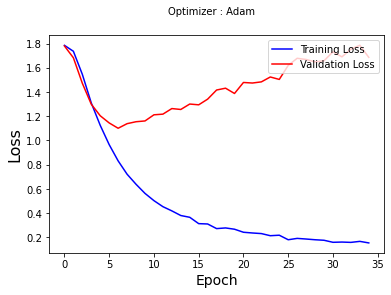

In [28]:
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')